In [1]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float32, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="convex_potential_flow",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=14,
        number_of_hidden_layers=4,
        n_blocks=4
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=0,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.load("../experiments/convex_banana_large_scale/convex_potential_flow/weights.pth")

Training: 0it [00:00, ?it/s]


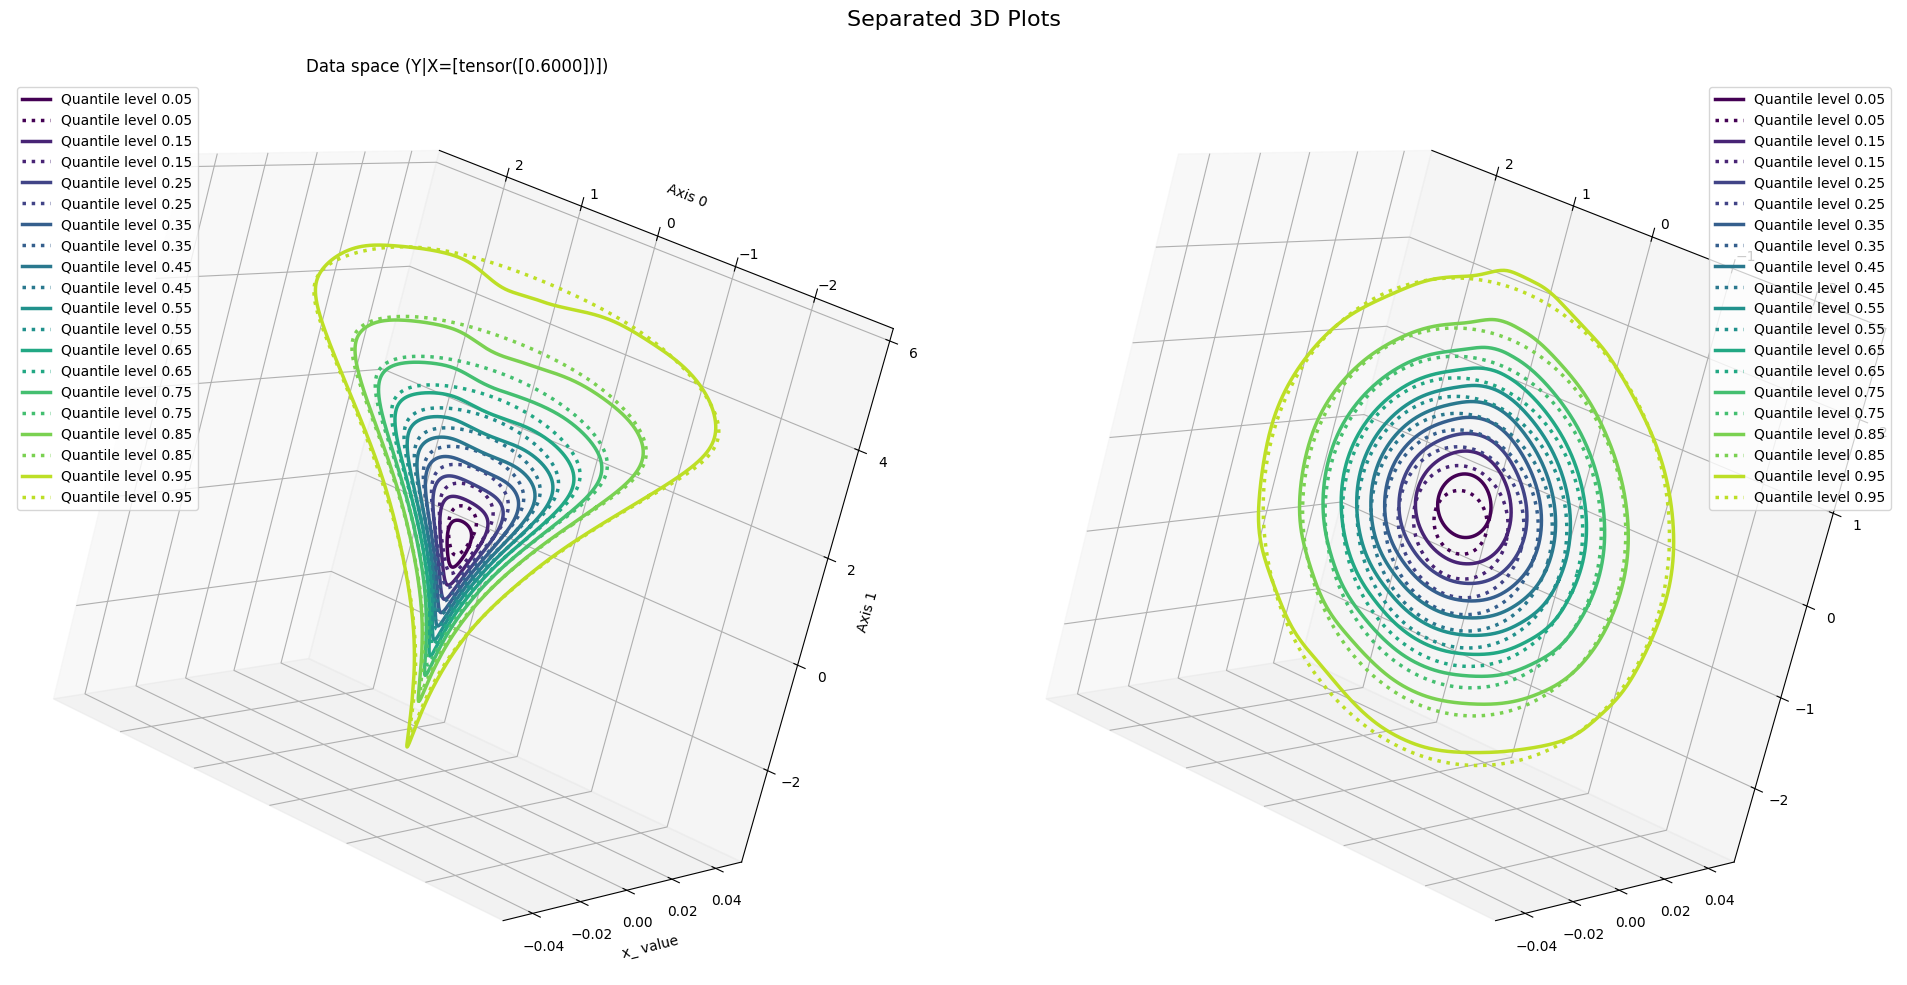

In [8]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
from datasets import ConvexBananaDataset
dataset = ConvexBananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[.6]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)